In [ ]:
%conda install pandas
%conda install numpy
%conda install matplotlib
%conda install seaborn
%conda install scikit-learn

Solving environment: \ ^C
failed with initial frozen solve. Retrying with flexible solve.

CondaError: KeyboardInterrupt


Note: you may need to restart the kernel to use updated packages.
Solving environment: / 

In [ ]:
conda update -n base conda

## A bit of data science work/wonk

## Speed of vectorization, matrix math, using numpy arrays

In [1]:
import numpy as np
from math import log10 as log10
import random
from time import time
print("Libraries imported")

Libraries imported


In [2]:
print(np.log10(100))

2.0


In [3]:
n = 10000000 #Set the variable n to 10,000,000

l1 = list(np.random.uniform(low=1.0, high = 100.0, size=n))

l2 = []

a1 = np.array(l1)

print("Variables are all set")

Variables are all set


In [4]:
t0 = time()

for i in l1:
    l2.append(log10(i))

loopTime = time()-t0

print('loop time: ' +str(round(loopTime,3)) + ' seconds')


loop time: 2.375 seconds


In [5]:
t0 = time()
a2 = np.log10(a1)
vectorTime = time() - t0

print("Vectorized time: " + str(round(vectorTime, 3)) + 'seconds')

Vectorized time: 0.047seconds


In [6]:
ratio = (loopTime/vectorTime)
print("Ratio = " + str(round(ratio,3)))

Ratio = 50.467


## Conclusion
- Vectorization speeds things up a lot. What used to be computed in a day can be done in an hour. 

## On to the Titanic!

In [7]:
#import data science libraries for use

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
#load training and test datasets into pandas dataframs

train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

#inspect your dataset, the first 5 rows

#some column/field definitions/explanations:
#Pclass = passenger class
#SibSp = # of siblings/spouses
#Parch = # of parents/children on board

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
#use pandas to desplay descriptive stats
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [11]:
#descriptive stats of test dataset
test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


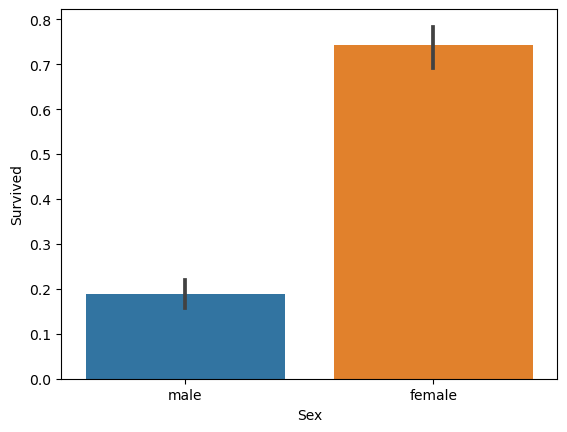

In [12]:
#visualizations
#who was more likely to survive? males or females?
#use seaborn bar graph

sns.barplot(x="Sex",y="Survived",data=train);

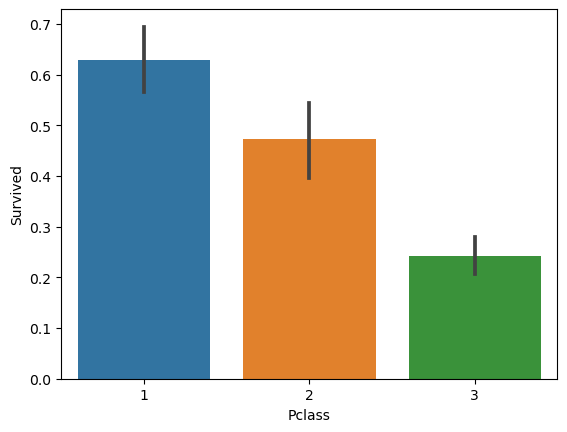

In [13]:
#which socioeconomic class was more likely to survive?
sns.barplot(x='Pclass',y='Survived',data=train);

<AxesSubplot: xlabel='Embarked', ylabel='Survived'>

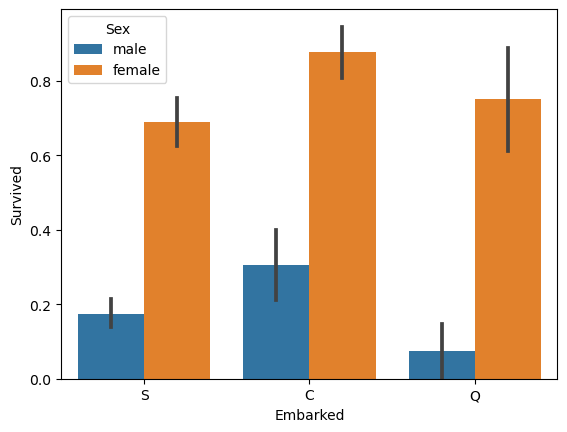

In [14]:
#did the point of embarcation make a diff?
#c = cherbourg(France), Queenstown, S = Southampton

sns.barplot(x="Embarked",y="Survived",hue = "Sex", data=train)

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


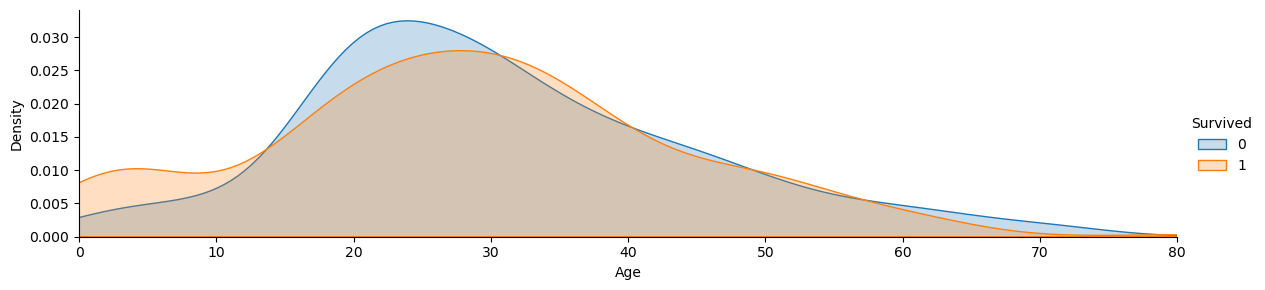

In [15]:
#what about age distribution

a=sns.FacetGrid(train,hue="Survived",aspect=4)
a.map(sns.kdeplot,"Age",shade=True)
a.set(xlim=(0,train['Age'].max()))
a.add_legend()

## What are we solving for? What's our dependent y variable?

## Survived (=1) or Died (=0)

In [16]:
y=train.Survived #This y variable will store the 'survived' data
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Now let's get the data ready

In [17]:
# Reformat the data into pandas datagrames to get ready for Machine Learning algorithms
# We have to know the shape of these datasets later when we join and split them

train_shape = train.shape #get the columns and rows of the training data
train_rows = train.shape[0]
train_cols = train.shape[1]

print("The shape of train is "+str(train_shape))
print("Our training set has  "+str(train_rows)+" rows")
print("Our training set has  "+str(train_cols)+" cols")

train.head()

The shape of train is (891, 12)
Our training set has  891 rows
Our training set has  12 cols


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
test_shape = test.shape #get the columns and rows of the test data
test_rows = test.shape[0]
test_cols = test.shape[1]

print("Our test set has  "+str(test_rows)+" rows")
print("Our test set has  "+str(test_cols)+" cols")
test.head()

Our test set has  418 rows
Our test set has  11 cols


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [19]:
# Now concatenate the test and training sets together to make sure that they transform correctly. We will split them later

combined = pd.concat((train,test)) #combine the train and test dataframes together

combined_shape = combined.shape
combined_rows = combined.shape[0]
combined_columns = combined.shape[1]

print("Our concatenated set has " +str(combined_rows) + " rows")
print("Our concatenated set has " +str(combined_columns) + " columns")
combined.head()

Our concatenated set has 1309 rows
Our concatenated set has 12 columns


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
# But what about the Survived column? It is in the train set but not the test set
# What are the entries in the combined dataset
combined.sample(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
329,1221,NaN,2,"Enander, Mr. Ingvar",male,21.0,0,0,236854,13.0000,NaN,S
177,1069,NaN,1,"Stengel, Mr. Charles Emil Henry",male,54.0,1,0,11778,55.4417,C116,C
447,448,1.0,1,"Seward, Mr. Frederic Kimber",male,34.0,0,0,113794,26.5500,NaN,S
272,1164,NaN,1,"Clark, Mrs. Walter Miller (Virginia McDowell)",female,26.0,1,0,13508,136.7792,C89,C
375,1267,NaN,1,"Bowen, Miss. Grace Scott",female,45.0,0,0,PC 17608,262.3750,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
578,579,0.0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C
60,952,NaN,3,"Dika, Mr. Mirko",male,17.0,0,0,349232,7.8958,NaN,S
582,583,0.0,2,"Downton, Mr. William James",male,54.0,0,0,28403,26.0000,NaN,S
793,794,0.0,1,"Hoyt, Mr. William Fisher",male,NaN,0,0,PC 17600,30.6958,NaN,C


In [21]:
combined

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [22]:
# Now, we transform the data, take care of the nulls, and simplify it by arranging values into bins
# and drop irrelevant or difficult columns/fields
# we will eliminate the Survived column, because we already set the Survived data as our dependent variable y

def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenage', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df

def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df

def drop_features(df):
    return df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId', 'Survived'], axis=1)

In [23]:
#define a function to run those above

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = drop_features(df)
    return df

combined = transform_features(combined)
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,Student,1,0,1_quartile,S
1,1,female,Adult,1,0,4_quartile,C
2,3,female,Young Adult,0,0,1_quartile,S
3,1,female,Young Adult,1,0,4_quartile,S
4,3,male,Young Adult,0,0,2_quartile,S


In [24]:
#Now we will do one hot encoding - Essentially pivot the binned fields into columns of 1s and 0s
combined = pd.get_dummies(combined)
combined.head()


,Pclass,SibSp,Parch,Sex_female,Sex_male,Age_Unknown,Age_Baby,Age_Child,Age_Teenage,Age_Student,...,Age_Adult,Age_Senior,Fare_Unknown,Fare_1_quartile,Fare_2_quartile,Fare_3_quartile,Fare_4_quartile,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,1,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
2,3,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,3,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [25]:
#load up the matricies, changes the pandas dataframes into numpy arrays, check fitting,
# and split the data back into training and test sets

# create an array from 'combined' that goes from the start to 'train_rows'
X_train = combined[:train_rows]
print("X_train: "+str(X_train.shape))

#create an array from 'combined' that goes from'train_rows' to the end
X_test = combined[train_rows:]
print('X_test: '+str(X_test.shape))

X_train: (891, 21)
X_test: (418, 21)


In [26]:
# load up a pile of classification models and processing tools from the scikit learn machine learning library

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [29]:
names = ['Logistic Regression','k-Nearest Neighbor','Linear SVM','RBF SVM',
        'Gaussian Process','Decision Tree','Random Forest','Neural Network','Adaboost'
        'Naive Bayes']

# create a list of classifiers

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel = 'linear',C=0.025),
    SVC(gamma=2,C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB()]
    

## Loop through all the classifiers to see how they perform on the dataset


In [30]:
# Use the zip function in a for loop  to run the ML algorithms with their names
# Use the fit function to match the data to the y dependent variable in each ML algorithm
# Measure their scores and print the results

for name,clf in zip(names, classifiers):
    clf.fit(X_train, y)
    accuracy = round(clf.score(X_train, y) * 100, 2)
    print(name, accuracy)

Logistic Regression 82.15
k-Nearest Neighbor 87.21
Linear SVM 78.68
RBF SVM 90.12
Gaussian Process 85.75
Decision Tree 84.51
Random Forest 83.61
Neural Network 81.48
AdaboostNaive Bayes 78.0


In [31]:
# let's pick the winner, the support vector machine with RBF kernel function
# store the model's predictions for each input (feature vector)

clf = SVC(gamma=2, C=1)
clf.fit(X_train, y)
accuracy = round(clf.score(X_train, y) * 100, 2)
print("Our accuracy score is: " + str(accuracy))
predictions = clf.predict(X_test)

Our accuracy score is: 90.12


In [32]:
# Export our prediction into a file for use by the outside world

solution = pd.DataFrame({"PassengerId":test.PassengerId,
                         "Survived":predictions})
solution.to_csv('best_fit.csv', index=False)

print("Prediction file has been created")

Prediction file has been created


In [35]:
best_fit = pd.read_csv("best_fit.csv")
best_fit.sample(20)

,PassengerId,Survived
69,961,0
203,1095,0
334,1226,0
151,1043,0
233,1125,0
362,1254,1
372,1264,0
325,1217,0
173,1065,0
328,1220,0
